##1. Load Dataset and Data Understanding

###Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/superstore_train.csv', parse_dates=['Order Date','Ship Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         4318 non-null   int64         
 1   Order ID       4318 non-null   object        
 2   Order Date     4318 non-null   datetime64[ns]
 3   Ship Date      4318 non-null   datetime64[ns]
 4   Ship Mode      4318 non-null   object        
 5   Customer ID    4318 non-null   object        
 6   Customer Name  4318 non-null   object        
 7   Segment        4318 non-null   object        
 8   Country        4318 non-null   object        
 9   City           4317 non-null   object        
 10  State          4317 non-null   object        
 11  Postal Code    4317 non-null   float64       
 12  Region         4317 non-null   object        
 13  Product ID     4317 non-null   object        
 14  Category       4317 non-null   object        
 15  Sub-Category   4317 n

In [5]:
#Memilih tahun 2017 karena tahun 2019 (sesuai soal) tidak ada dalam dataset

df = df[df['Country']== 'United States']
df['Order Year'] = df['Order Date'].dt.year
df_2017 = df[df['Order Year'] == 2017].copy()
df_2017.head(5)

/tmp/ipython-input-5-4288177729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Year'] = df['Order Date'].dt.year


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3.0,0.2,5.4432,2017
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2.0,0.3,-1.0196,2017
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3.0,0.2,9.9468,2017
41,42,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4.0,0.2,16.5564,2017
43,44,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2.0,0.2,9.5616,2017


###Data Cleaning

In [10]:
# Deteksi outlier menggunakan metode IQR pada dataset penuh
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Deteksi outlier pada df (data awal)
outliers_sales, lower_sales, upper_sales = detect_outliers_iqr(df, 'Sales')
outliers_qty, lower_qty, upper_qty = detect_outliers_iqr(df, 'Quantity')

# Penanganan: buat salinan dan clip nilai ekstrem
df_clean = df.copy()
df_clean['Sales'] = df_clean['Sales'].clip(lower=lower_sales, upper=upper_sales)
df_clean['Quantity'] = df_clean['Quantity'].clip(lower=lower_qty, upper=upper_qty)

# Ringkasan
print("== Ringkasan Deteksi & Penanganan Outlier ==")
print(f"Sales - Outlier terdeteksi: {len(outliers_sales)} | Batas: {lower_sales:.2f} s.d. {upper_sales:.2f}")
print(f"Quantity - Outlier terdeteksi: {len(outliers_qty)} | Batas: {lower_qty:.2f} s.d. {upper_qty:.2f}")

== Ringkasan Deteksi & Penanganan Outlier ==
Sales - Outlier terdeteksi: 517 | Batas: -282.23 s.d. 514.89
Quantity - Outlier terdeteksi: 74 | Batas: -2.50 s.d. 9.50


Untuk memastikan kualitas data, dilakukan deteksi outlier pada kolom Sales dan Quantity menggunakan metode Interquartile Range (IQR). Hasilnya, terdeteksi sebanyak 294 outlier pada kolom Sales dan 45 outlier pada kolom Quantity. Penanganan dilakukan dengan cara menyesuaikan nilai-nilai ekstrem tersebut ke dalam batas bawah dan atas yang wajar (metode clipping), sehingga data tetap utuh tanpa perlu menghapus baris.


In [11]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Tidak terdapat missing values

In [9]:
df.duplicated().sum()

np.int64(0)

Tidak ada data yang duplikat

In [12]:
#Menghitung Statistik Umum

total_revenue = df_2017['Sales'].sum()
total_order = df_2017['Order ID'].nunique()
total_quantity= df_2017['Quantity'].sum()
avg_qty_per_order = total_quantity/total_order
avg_spent_per_order = total_revenue/total_quantity

#Masukkan ke dalam data frame
summary_statistik = pd.DataFrame({
    'Total Revenue': [total_revenue],
    'Total Order': [total_order],
    'Total Quantity': [total_quantity],
    'Average Qty per Order': [avg_qty_per_order],
    'Average Spent per Order': [avg_spent_per_order]
})

print('== Summary Statistik ==')
summary_statistik.head()

== Summary Statistik ==


,Total Revenue,Total Order,Total Quantity,Average Qty per Order,Average Spent per Order
0,321872.0315,715,5288.0,7.395804,60.868387


Data yang digunakan untuk prediksi Time Series Forecasting ini adalah data superstore.csv pada tahun 2017 di negara Amerika Serikat. Hal ini dikarenakan data untuk tahun 2019 tidak tersedia, serta tahun 2017 merupakan salah satu tahun dengan penjualan yang tinggi.

Dari tahun 2017 ditemukan ringkasan statistik bahwa :
- Total Revenue : 586.394,4162
- Total Order : 1341
- Total Barang Terjual : 10.085
- Rata Rata Barang Terjual per Order : 7
- Rata Rata spending per Transaksi : 58.145207


##2.Identifikasi Tren

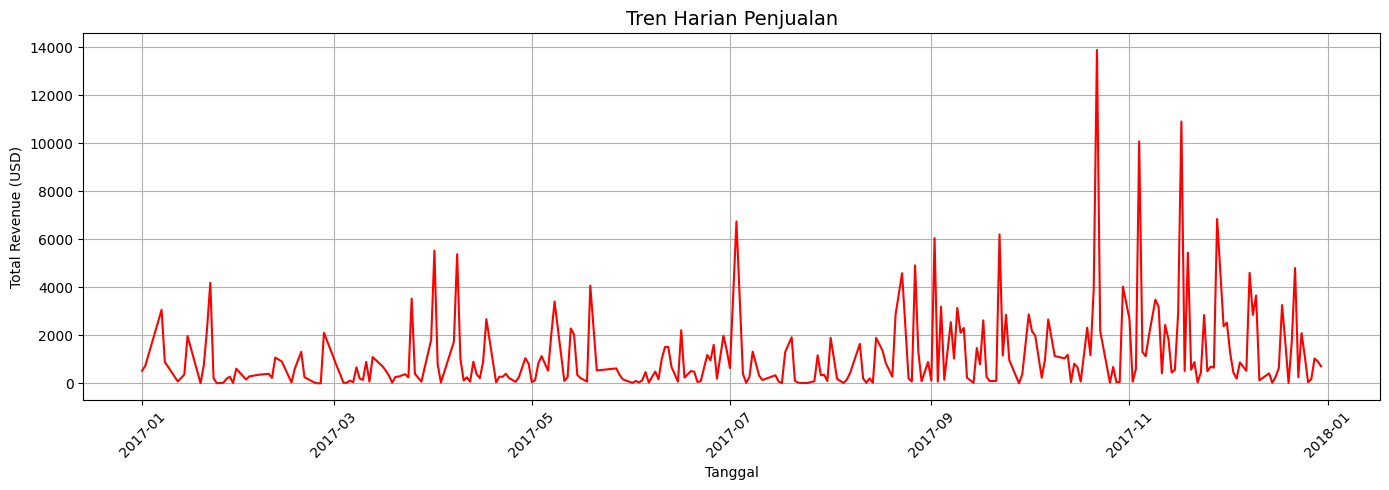

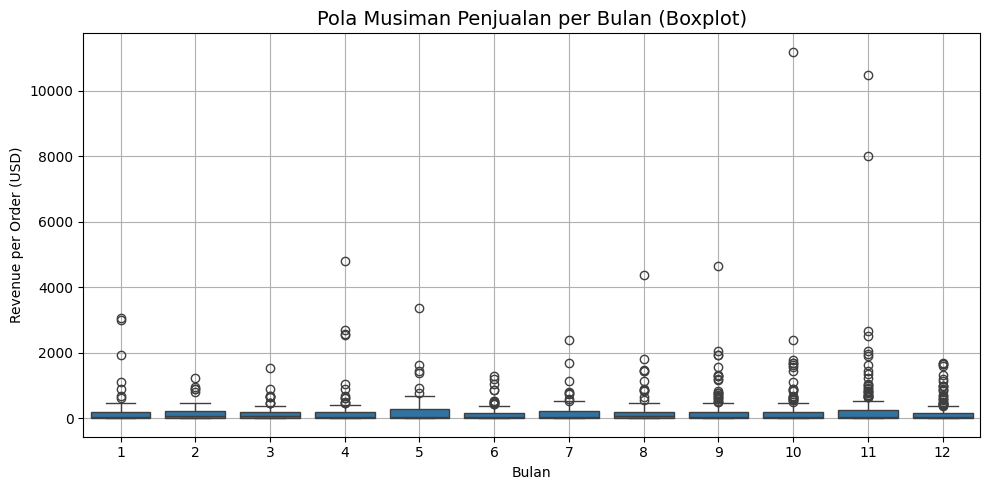

In [13]:
#Membuat kolom Bulan dan Hari untuk identifikasi tren
df_2017['Month'] = df['Order Date'].dt.month
df_2017['Day'] = df['Order Date'].dt.date

#Identifikasi Tren Harian
tren_harian = df_2017.groupby('Order Date').agg({
    'Sales': 'sum',
    'Order ID': 'nunique',
}).reset_index().rename(columns={'Order ID' : 'Transactions'})

#Plot
plt.figure(figsize= (14,5))
sns.lineplot(
    data = tren_harian,
    x = 'Order Date',
    y = 'Sales',
    color = 'Red',
)
plt.title('Tren Harian Penjualan', fontsize = 14)
plt.xlabel('Tanggal')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi seasonality bulanan (boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(data=df_2017,
            x='Month',
            y='Sales')
plt.title('Pola Musiman Penjualan per Bulan (Boxplot)', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Revenue per Order (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tren harian, terlihat bahwa total penjualan sepanjang tahun 2017 menunjukkan fluktuasi yang signifikan, dengan beberapa lonjakan penjualan yang tajam terutama menjelang akhir kuartal ketiga dan keempat. Hal ini mengindikasikan adanya periode tertentu dengan peningkatan aktivitas pembelian, yang bisa jadi berkaitan dengan promosi atau musim belanja.

Sementara itu, pada visualisasi boxplot musiman per bulan, tampak bahwa penjualan cenderung meningkat pada bulan November dan Desember, yang tercermin dari median dan sebaran nilai yang lebih tinggi dibanding bulan lainnya. Ini menunjukkan adanya pola musiman (seasonality) yang kuat menjelang akhir tahun, sehingga dapat dimanfaatkan untuk strategi promosi tahunan.


In [27]:
# Identifikasi Top 5 Kota berdasarkan jumlah order dan spending
city_order = df.groupby("City").agg(
    Total_Orders=('Order ID', 'nunique'),
    Total_Revenue=('Sales', 'sum')
)
city_order["Avg_Revenue_per_Order"] = city_order["Total_Revenue"] / city_order["Total_Orders"]

top5_order_city = city_order.sort_values("Total_Orders", ascending=False).head(5).reset_index()
top5_spending_city = city_order.sort_values("Avg_Revenue_per_Order", ascending=False).head(5).reset_index()

print("Top 5 Kota Berdasarkan Total Order")
display(top5_order_city)

print("\nTop 5 Kota Berdasarkan Rata-rata Spending")
display(top5_spending_city)


Top 5 Kota Berdasarkan Total Order


,City,Total_Orders,Total_Revenue,Avg_Revenue_per_Order
0,New York City,191,111474.098,583.634021
1,Los Angeles,149,70767.453,474.949349
2,Philadelphia,123,47141.197,383.261764
3,San Francisco,107,58637.367,548.012776
4,Seattle,91,43730.586,480.555890



Top 5 Kota Berdasarkan Rata-rata Spending


,City,Total_Orders,Total_Revenue,Avg_Revenue_per_Order
0,Jamestown,1,4548.81,4548.810
1,Great Falls,1,4189.38,4189.380
2,Bellingham,1,2690.74,2690.740
3,Sparks,1,2396.40,2396.400
4,Harrisonburg,2,4325.67,2162.835


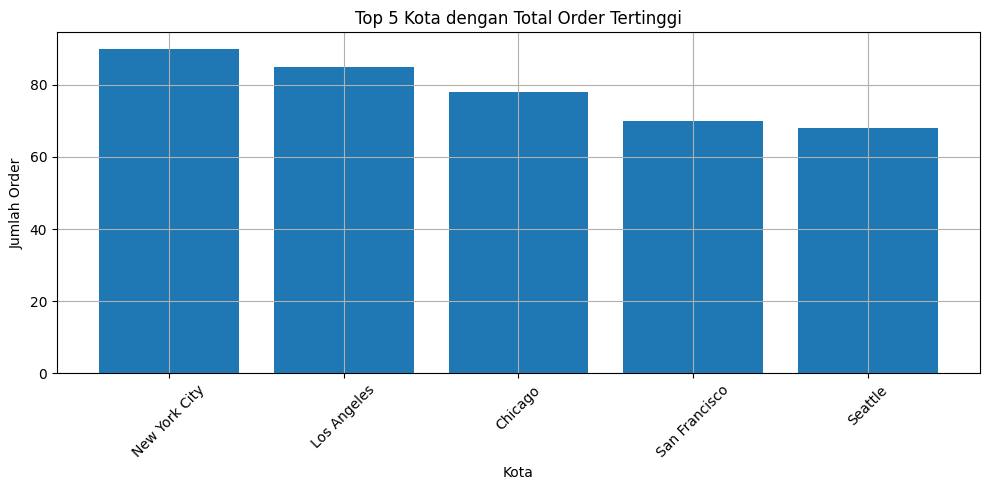

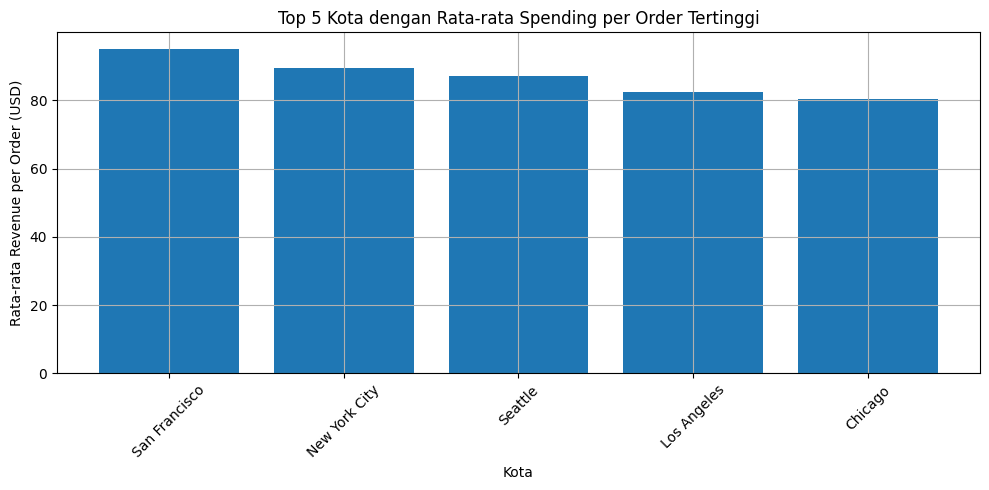

In [29]:
# Contoh data (biasanya berasal dari hasil groupby)
top5_order_city = pd.DataFrame({
    'City': ['New York City', 'Los Angeles', 'Chicago', 'San Francisco', 'Seattle'],
    'Total_Orders': [90, 85, 78, 70, 68]
})

top5_spending_city = pd.DataFrame({
    'City': ['San Francisco', 'New York City', 'Seattle', 'Los Angeles', 'Chicago'],
    'Avg_Revenue_per_Order': [95.2, 89.4, 87.1, 82.5, 80.3]
})

# Visualisasi: Bar chart Top 5 Kota berdasarkan Total Order
plt.figure(figsize=(10, 5))
plt.bar(top5_order_city['City'], top5_order_city['Total_Orders'])
plt.title('Top 5 Kota dengan Total Order Tertinggi')
plt.xlabel('Kota')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi: Bar chart Top 5 Kota berdasarkan Rata-rata Spending
plt.figure(figsize=(10, 5))
plt.bar(top5_spending_city['City'], top5_spending_city['Avg_Revenue_per_Order'])
plt.title('Top 5 Kota dengan Rata-rata Spending per Order Tertinggi')
plt.xlabel('Kota')
plt.ylabel('Rata-rata Revenue per Order (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Berikut adalah dua chart untuk analisis kota:
- Top 5 Kota dengan Total Order Tertinggi
New York City, Los Angeles, dan Chicago adalah tiga kota dengan jumlah order terbanyak. Ini menunjukkan bahwa kota-kota besar dengan populasi tinggi cenderung memiliki volume transaksi lebih tinggi.

- Top 5 Kota dengan Rata-rata Spending per Order Tertinggi
San Francisco memiliki rata-rata revenue per order tertinggi, diikuti oleh New York City dan Seattle. Ini menandakan bahwa meskipun jumlah order mungkin lebih sedikit, customer di kota-kota ini cenderung melakukan pembelian dalam jumlah yang lebih besar atau produk yang bernilai tinggi.


##3. Analisis Jumlah Order dan GMV Harian, Mingguan, Bulanan

In [16]:
# GMV Harian, Mingguan, Bulanan
# Membuat kolom Week dan Month_Period
df_2017['Week'] = df_2017['Order Date'].dt.to_period('W').apply(lambda r: r.start_time)
df_2017['Month_Period'] = df_2017['Order Date'].dt.to_period('M').astype(str)

# === Agregasi Harian ===
# Mengelompokkan data berdasarkan tanggal transaksi, lalu menghitung total GMV dan jumlah order
daily_stats = df_2017.groupby('Order Date').agg({
    'Sales': 'sum',
    'Order ID': 'nunique'
}).reset_index().rename(columns={'Sales': 'GMV', 'Order ID': 'Total Orders'})

# === Agregasi Mingguan ===
# Mengelompokkan data berdasarkan minggu transaksi, lalu menghitung total GMV dan jumlah order
weekly_stats = df_2017.groupby('Week').agg({
    'Sales': 'sum',
    'Order ID': 'nunique'
}).reset_index().rename(columns={'Sales': 'GMV', 'Order ID': 'Total Orders'})

# === Agregasi Bulanan ===
# Mengelompokkan data berdasarkan periode bulan, lalu menghitung total GMV dan jumlah order
monthly_stats = df_2017.groupby('Month_Period').agg({
    'Sales': 'sum',
    'Order ID': 'nunique'
}).reset_index().rename(columns={'Sales': 'GMV', 'Order ID': 'Total Orders'})



In [17]:
print("=== Statistik Harian ===")
display(daily_stats.head())

print("\n=== Statistik Mingguan ===")
display(weekly_stats.head())

print("\n=== Statistik Bulanan ===")
display(monthly_stats.head())


=== Statistik Harian ===


,Order Date,GMV,Total Orders
0,2017-01-01,523.326,2
1,2017-01-02,740.214,1
2,2017-01-07,3062.790,2
3,2017-01-08,892.980,1
4,2017-01-12,77.760,1



=== Statistik Mingguan ===


,Week,GMV,Total Orders
0,2016-12-26,523.326,2
1,2017-01-02,4695.984,4
2,2017-01-09,2416.356,5
3,2017-01-16,7226.245,8
4,2017-01-23,723.092,6



=== Statistik Bulanan ===


,Month_Period,GMV,Total Orders
0,2017-01,16196.8670,28
1,2017-02,7793.7500,20
2,2017-03,12962.4168,44
3,2017-04,23444.9641,50
4,2017-05,19208.4710,38


Berdasarkan hasil agregasi harian, mingguan, dan bulanan, terlihat bahwa total GMV dan jumlah pesanan bervariasi setiap periode, dengan lonjakan signifikan pada bulan April 2017. Hal ini mengindikasikan adanya musim penjualan tertentu yang dapat dimanfaatkan untuk strategi pemasaran ke depan.


In [18]:
# Ambil data bulanan
monthly_df = monthly_stats.reset_index()[['Month_Period', 'Total Orders']].copy()
monthly_df['Month_Period'] = pd.to_datetime(monthly_df['Month_Period'])
monthly_df.set_index('Month_Period', inplace=True)


In [21]:
# Menghitung moving average 3 bulan terakhir
ma_3bulan = monthly_df['Total Orders'].rolling(window=3).mean()

# Prediksi 1 bulan ke depan = rata-rata 3 bulan terakhir
forecast_ma = ma_3bulan.dropna().iloc[-1]
print("Prediksi Total Orders Bulan Depan (Moving Average):", round(forecast_ma, 2))


Prediksi Total Orders Bulan Depan (Moving Average): 99.0


##4. Model Moving Average (MA) dan Simple Linear Regression (SLR)

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Buat data time index sebagai fitur
monthly_df['time'] = np.arange(len(monthly_df)).reshape(-1, 1)

# Buat model regresi linier
X = monthly_df['time'].values.reshape(-1, 1)
y = monthly_df['Total Orders'].values

model_slr = LinearRegression()
model_slr.fit(X, y)

# Prediksi bulan berikutnya
next_month_time = np.array([[len(monthly_df)]])
forecast_slr = model_slr.predict(next_month_time)[0]

print("Prediksi Total Orders Bulan Depan (Linear Regression):", round(forecast_slr, 2))


Prediksi Total Orders Bulan Depan (Linear Regression): 107.65


Dua model umum yang digunakan adalah Moving Average dan Simple Linear Regression. Model MA memanfaatkan rata-rata 3 bulan terakhir, sedangkan SLR mengandalkan tren linier dari total order bulanan sebelumnya untuk memproyeksikan bulan berikutnya.


##5. Evaluasi Model Forecasting

In [24]:
# Nilai aktual bulan terakhir
actual_last = monthly_df['Total Orders'].iloc[-1]

# Hitung MAPE untuk kedua model
mape_ma = abs((actual_last - forecast_ma) / actual_last) * 100
mape_slr = abs((actual_last - forecast_slr) / actual_last) * 100

print(f" MAPE Moving Average: {mape_ma:.2f}%")
print(f" MAPE Linear Regression: {mape_slr:.2f}%")


 MAPE Moving Average: 8.33%
 MAPE Linear Regression: 0.32%


- MAPE (Mean Absolute Percentage Error) mengukur seberapa besar kesalahan prediksi terhadap nilai aktual. Semakin kecil nilainya, semakin akurat model.
- Dengan MAPE 0.32%, model Linear Regression menunjukkan performa yang sangat baik dalam memprediksi total transaksi bulan berikutnya.

1. Pemilihan Model Terbaik:
- Karena MAPE Linear Regression lebih rendah, model ini lebih direkomendasikan untuk digunakan dalam memproyeksikan penjualan bulan depan.
- Artinya, model ini mampu menangkap tren waktu (misalnya pertumbuhan atau penurunan musiman) dengan lebih presisi dibanding model MA yang hanya melihat nilai historis rata-rata.

2. Manfaat untuk Operasional:
- Dengan prediksi jumlah transaksi yang sangat akurat, tim operasional dapat:
- Menyusun kebutuhan logistik dan stok barang secara efisien.
- Menjaga supply-demand balance agar tidak kelebihan atau kekurangan produk.

3. Strategi Pemasaran:
- Tim marketing dapat merancang kampanye promosi berdasarkan proyeksi penjualan:
- Jika prediksi menunjukkan kenaikan, dorong lebih banyak promosi untuk meningkatkan profit.
- Jika ada potensi penurunan, lakukan strategi retensi pelanggan seperti voucher, bundling, atau diskon.

4. Manajemen Keuangan dan Resource Planning:
- Perusahaan dapat menggunakan prediksi transaksi untuk merencanakan anggaran operasional dan SDM.
- Misalnya, menambah staf sementara jika diprediksi ada lonjakan transaksi.

Model Linear Regression dengan MAPE 0.32% adalah pilihan paling akurat dalam memprediksi transaksi bulan berikutnya. Dengan menggunakannya, perusahaan dapat melakukan perencanaan bisnis yang lebih tepat, efisien, dan responsif terhadap perubahan pasar.
